# Predict H1N1 and Seasonal Flu Vaccines

## Preprocessing

### Import libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Import data

In [2]:
features_raw_df = pd.read_csv("data/training_set_features.csv", index_col="respondent_id")
labels_raw_df = pd.read_csv("data/training_set_labels.csv", index_col="respondent_id")

In [3]:
print("features_raw_df.shape", features_raw_df.shape)
features_raw_df.head()

features_raw_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
features_raw_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [5]:
print("labels_raw_df.shape", labels_raw_df.shape)
labels_raw_df.head()

labels_raw_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [6]:
labels_raw_df.dtypes

h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

In [7]:
features_df = features_raw_df.copy()
labels_df = labels_raw_df.copy()

### Exploratory Data Analysis

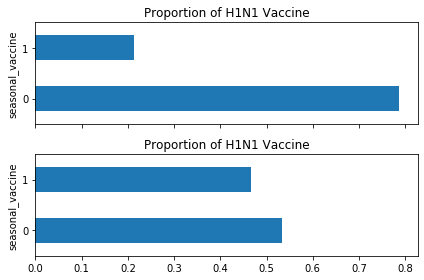

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_entries = labels_df.shape[0]

(labels_df['h1n1_vaccine'].value_counts().div(n_entries)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0]))
ax[0].set_ylabel("seasonal_vaccine")

(labels_df['seasonal_vaccine'].value_counts().div(n_entries)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[1]))
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [9]:
pd.crosstab(
    labels_df["h1n1_vaccine"], 
    labels_df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [10]:
(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)

0.37714265306144507

### Features

In [11]:
df = features_df.join(labels_df)
print(df.shape)
df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [12]:
h1n1_concern_vaccine = df[['h1n1_concern', 'h1n1_vaccine']].groupby(['h1n1_concern', 'h1n1_vaccine']).size().unstack()
h1n1_concern_vaccine

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


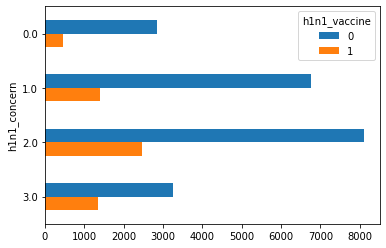

In [13]:
ax = h1n1_concern_vaccine.plot.barh()
ax.invert_yaxis()

In [14]:
h1n1_concern_counts = h1n1_concern_vaccine.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [15]:
h1n1_concern_vaccine_prop = h1n1_concern_vaccine.div(h1n1_concern_counts, axis='index')
h1n1_concern_vaccine_prop

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


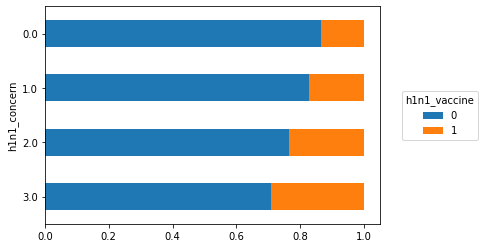

In [17]:
ax = h1n1_concern_vaccine_prop.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title='h1n1_vaccine')
plt.show()

In [18]:
def vaccination_rate_plot(vaccine, feature, df, ax=None):

    feature_vaccine = df[[feature, vaccine]].groupby([feature, vaccine]).size().unstack()
    counts = feature_vaccine.sum(axis='columns')
    proportions = feature_vaccine.div(counts, axis='index')

    ax = proportions.plot.barh(stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=vaccine)
    ax.legend().remove()

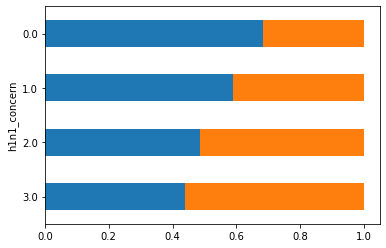

In [19]:
vaccination_rate_plot('seasonal_vaccine', 'h1n1_concern', df)

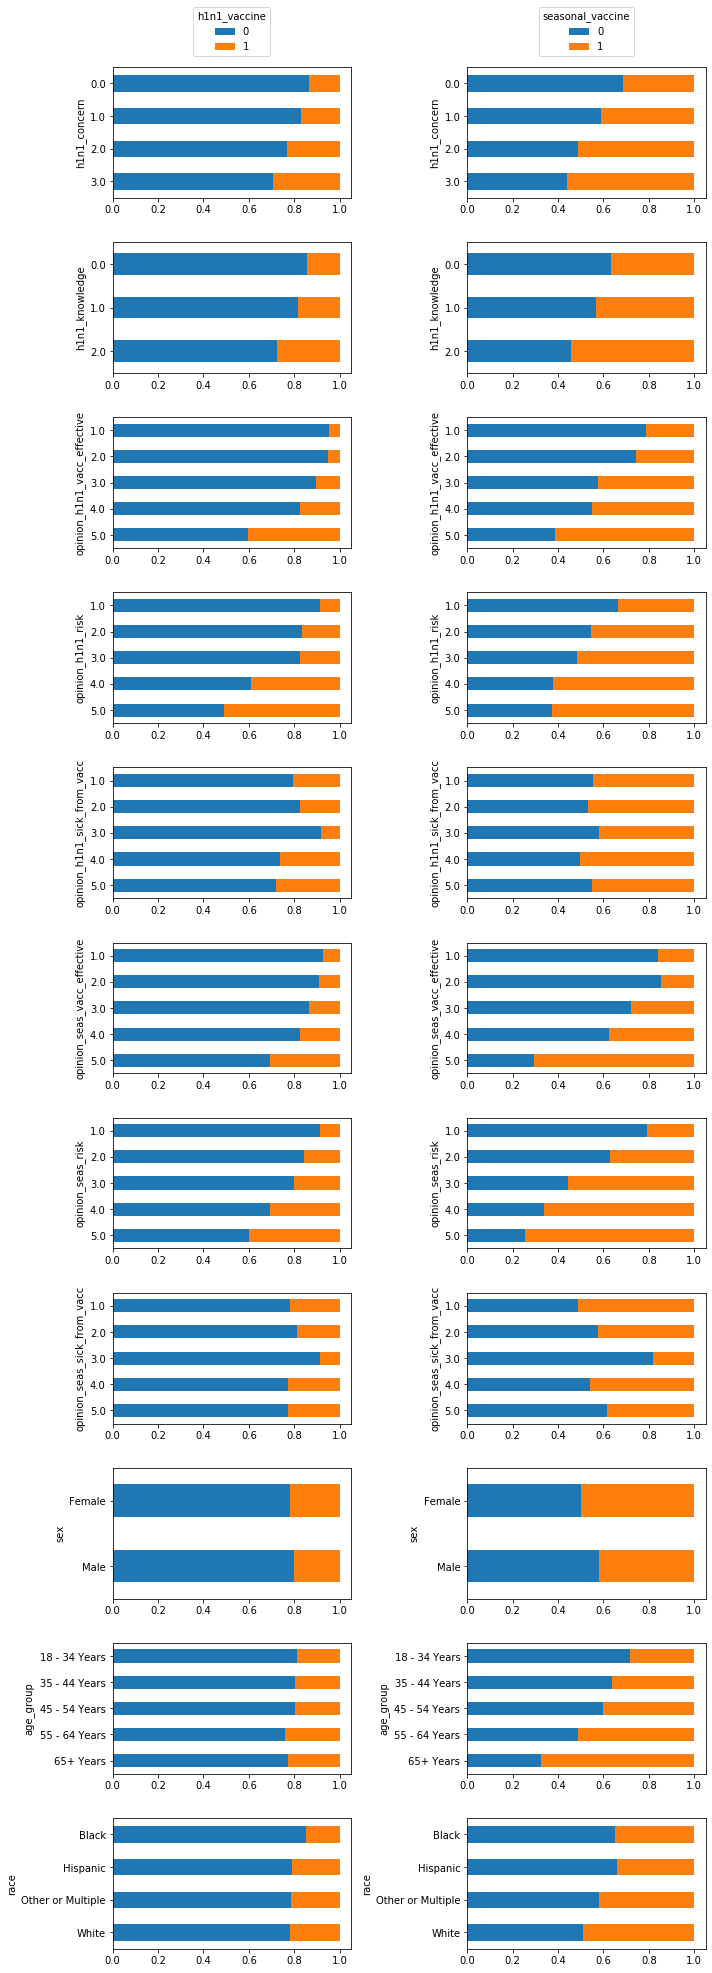

In [20]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(10,len(cols_to_plot)*2.5))


for idx, col in enumerate(cols_to_plot):
    
    vaccination_rate_plot('h1n1_vaccine', col, df, ax=ax[idx, 0])
    vaccination_rate_plot('seasonal_vaccine', col, df, ax=ax[idx, 1])
    
    ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
    ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')
  
fig.tight_layout()

### Categorical columns

In [21]:
features_df = features_raw_df.copy()
labels_df = labels_raw_df.copy()

In [22]:
features_df.dtypes == object

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_worker                  False
health_insurance               False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
age_group                       True
education                       True
race                            True
sex                             True
income_poverty                  True
marital_status                  True
r

In [66]:
# All categorical columns considered apart from employment-related
categorical_cols = features_df.columns[features_df.dtypes == "object"].values[:-2]
categorical_cols

array(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa'], dtype=object)

In [67]:
categorical_cols = np.delete(categorical_cols, np.where(categorical_cols == 'hhs_geo_region'))
categorical_cols

array(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'census_msa'],
      dtype=object)

In [51]:
features_df.employment_occupation.unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

In [45]:
features_df.hhs_geo_region.unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [68]:
features_df[categorical_cols].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
respondent_id,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


In [69]:
for col in categorical_cols:
    col_dummies = pd.get_dummies(features_df[col], drop_first = True)
    features_df = features_df.drop(col, axis=1)
    features_df = pd.concat([features_df, col_dummies], axis=1)


In [70]:
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,White,Male,"> $75,000",Below Poverty,Not Married,Rent,Not in Labor Force,Unemployed,"MSA, Principle City",Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,1,1,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,1,0,1,1,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1,1,0,0,1,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,1,1,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [74]:
features_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
hhs_geo_region                     0
household_adults                 249
household_children               249
employment_industry            13330
employment_occupation          13470
35 - 44 Years                      0
4

In [114]:
def preprocess_categorical(df):
    categorical_cols = df.columns[df.dtypes == "object"].values[:-2]
    categorical_cols = np.delete(categorical_cols, np.where(categorical_cols == 'hhs_geo_region'))
    
    for col in categorical_cols:
        col_dummies = pd.get_dummies(df[col], drop_first = True)
        df = df.drop(col, axis=1)
        df = pd.concat([df, col_dummies], axis=1)
        
    df = df.drop(['hhs_geo_region', 'employment_industry', 'employment_occupation'], axis=1)
        
    return df

## MACHINE LEARNING

### Machine Learning Model

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6 

In [77]:
features_raw_df.dtypes != "object"

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [115]:
numeric_cols = features_raw_df.columns[features_raw_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


### Features Preprocessing

In [116]:
# chain preprocessing into a Pipeline object
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

In [117]:
# create the preprocessor stage of final pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "passthrough"
)

In [118]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [119]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [121]:
features_df_trans = preprocess_categorical(features_df)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df_trans,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [123]:
X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,< 12 Years,College Graduate,Some College,Hispanic,Other or Multiple,White,Male,"> $75,000",Below Poverty,Not Married,Rent,Not in Labor Force,Unemployed,"MSA, Principle City",Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16069,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
15318,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0
21253,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,2.0,1.0,1.0,0.0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1
24458,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,4.0,4.0,2.0,4.0,4.0,2.0,1.0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
17301,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,4.0,4.0,4.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
10492,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,2.0,1.0,4.0,4.0,4.0,1.0,1.0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0
12016,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,3.0,5.0,5.0,2.0,2.0,4.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0


In [125]:
# Train model
full_pipeline.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                          

In [128]:
# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_test)
preds

[array([[0.69440508, 0.30559492],
        [0.91377872, 0.08622128],
        [0.77982099, 0.22017901],
        ...,
        [0.94066445, 0.05933555],
        [0.92626378, 0.07373622],
        [0.92928945, 0.07071055]]), array([[0.62849381, 0.37150619],
        [0.59728506, 0.40271494],
        [0.21432829, 0.78567171],
        ...,
        [0.8538049 , 0.1461951 ],
        [0.89875657, 0.10124343],
        [0.11616688, 0.88383312]])]

In [129]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [130]:
y_pred = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_test.index
)
print("y_pred.shape:", y_pred.shape)
y_pred.head()

y_pred.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.305595,0.371506
16516,0.086221,0.402715
3106,0.220179,0.785672
16981,0.702509,0.920977
19111,0.233934,0.735920


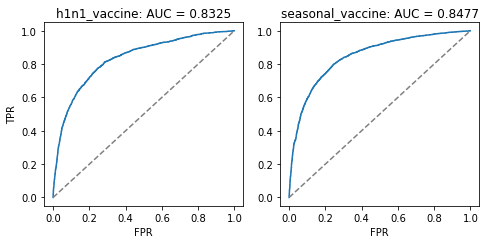

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

fpr, tpr, thresholds = roc_curve(y_test['h1n1_vaccine'], y_pred['h1n1_vaccine'])
ax[0].plot(fpr, tpr)
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
ax[0].set_ylabel('TPR')
ax[0].set_xlabel('FPR')
ax[0].set_title(f"{'h1n1_vaccine'}: AUC = {roc_auc_score(y_test['h1n1_vaccine'], y_pred['h1n1_vaccine']):.4f}")
                                
fpr, tpr, thresholds = roc_curve(y_test['seasonal_vaccine'], y_pred['seasonal_vaccine'])
ax[1].plot(fpr, tpr)
ax[1].plot([0, 1], [0, 1], color='grey', linestyle='--')               
ax[1].set_xlabel('FPR')
ax[1].set_title(f"{'seasonal_vaccine'}: AUC = {roc_auc_score(y_test['seasonal_vaccine'], y_pred['seasonal_vaccine']):.4f}")

fig.tight_layout()

In [132]:
roc_auc_score(y_test, y_pred)

0.8401033140474202

### Retrain on full Dataset

In [133]:
full_pipeline.fit(features_df_trans, labels_df);

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## PREDICTIONS FOR THE TEST SET

In [134]:
test_features_df = pd.read_csv('data/test_set_features.csv', index_col='respondent_id')

In [135]:
test_features_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [136]:
test_features_df_trans = preprocess_categorical(test_features_df)

In [137]:
test_preds = full_pipeline.predict_proba(test_features_df_trans)

In [138]:
submission_df = pd.read_csv('data/submission_format.csv', index_col='respondent_id')

In [139]:
# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_preds[0][:, 1]
submission_df["seasonal_vaccine"] = test_preds[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.076414,0.250469
26708,0.047150,0.039877
26709,0.467603,0.687419
26710,0.502558,0.900696
26711,0.203094,0.500339


In [140]:
submission_df.to_csv('data/my_submission.csv', index=True)